In [2]:
# 경고(warning)비표시
import warnings
warnings.filterwarnings('ignore')

# 6장 물류의 최적경로를 컨설팅하는 테크닉10

### 테크닉 51 : 물류데이터를 불러오자

In [1]:
import pandas as pd
factories = pd.read_csv('tbl_factory.csv', index_col=0)
factories

,FCName,FCDemand,FCRegion
FCID,,,
FC00001,서울공장,28,북부
FC00002,수원공장,29,북부
FC00003,인천공장,31,북부
FC00004,대전공장,25,북부
FC00005,대구공장,21,남부
FC00006,광주공장,30,남부
FC00007,부산공장,25,남부
FC00008,울산공장,16,남부


In [4]:
warehouses = pd.read_csv('tbl_warehouse.csv', index_col=0)
cost = pd.read_csv('rel_cost.csv',index_col=0)
print(warehouses.head(),warehouses.info())
print(cost.head())

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, WH00001 to WH00006
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   WHName    6 non-null      object
 1   WHSupply  6 non-null      int64 
 2   WHRegion  6 non-null      object
dtypes: int64(1), object(2)
memory usage: 192.0+ bytes
        WHName  WHSupply WHRegion
WHID                             
WH00001   판교창고        35       북부
WH00002   용인창고        41       북부
WH00003   수원창고        42       북부
WH00004   대전창고        60       남부
WH00005   대구창고        72       남부 None
            FCID     WHID  Cost
RCostID                        
1        FC00001  WH00001   0.4
2        FC00001  WH00002   0.8
3        FC00001  WH00003   1.5
4        FC00002  WH00001   0.9
5        FC00002  WH00002   0.8


In [6]:
trans = pd.read_csv('tbl_transaction.csv', index_col=0)
trans.head()

,TransactionDate,ToFC,FromWH,Quantity
TRID,,,,
0,2019-01-01 02:11:10,FC00004,WH00003,33
1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2019-01-01 06:32:32,FC00006,WH00004,31
3,2019-01-01 07:17:06,FC00002,WH00003,18
4,2019-01-01 07:52:18,FC00001,WH00002,30


In [7]:
join_data = pd.merge(trans, cost, left_on=['ToFC', 'FromWH'], right_on=['FCID', 'WHID'], how="left")
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8


In [8]:
join_data = pd.merge(join_data, factories, on='FCID', how="left")

In [10]:
join_data = pd.merge(join_data, warehouses, on="WHID")
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,대전공장,25,북부,수원창고,42,북부
1,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6,수원공장,29,북부,수원창고,42,북부
2,2019-01-01 09:09:30,FC00001,WH00003,12,FC00001,WH00003,1.5,서울공장,28,북부,수원창고,42,북부
3,2019-01-01 10:52:55,FC00003,WH00003,27,FC00003,WH00003,1.5,인천공장,31,북부,수원창고,42,북부
4,2019-01-03 20:23:03,FC00002,WH00003,17,FC00002,WH00003,1.6,수원공장,29,북부,수원창고,42,북부


In [11]:
join_data = join_data[['TransactionDate', 'Quantity', 'Cost', 'ToFC', 'FCName', 'FCDemand', "FromWH","WHName","WHSupply","WHRegion"]]
join_data.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부
1,2019-01-01 07:17:06,18,1.6,FC00002,수원공장,29,WH00003,수원창고,42,북부
2,2019-01-01 09:09:30,12,1.5,FC00001,서울공장,28,WH00003,수원창고,42,북부
3,2019-01-01 10:52:55,27,1.5,FC00003,인천공장,31,WH00003,수원창고,42,북부
4,2019-01-03 20:23:03,17,1.6,FC00002,수원공장,29,WH00003,수원창고,42,북부


In [13]:
len(join_data)

4000

In [14]:
north = join_data[join_data['WHRegion'] == '북부']
south = join_data[join_data['WHRegion'] == '남부']

### 테크닉 52 : 현재 운송량, 비용을 확인해보자

In [16]:
print('북부 비용 :' + str(north['Cost'].sum()) + '만원')
print('남부 비용 :' + str(south['Cost'].sum()) + '만원')

북부 비용 :2189.3만원
남부 비용 :2062.0만원


In [17]:
print('북부 건수 :' + str(north['Quantity'].sum()) + '건')
print('남부 건수 :' + str(south['Quantity'].sum()) + '건')

북부 건수 :49146건
남부 건수 :50214건


In [22]:
# 건당 운송 비용
print('북부 건당 비용 :' + str(int(north['Cost'].sum()/north['Quantity'].sum()*10000)) + '원')
print('남부 건당 비용 :' + str(int(south['Cost'].sum()/south['Quantity'].sum()*10000)) + '원')

북부 건당 비용 :445원
남부 건당 비용 :410원


#### 위 데이터를 통해 남부가 북부보다 배송 효율이 더 좋은 것을 알 수 있음

### 테크닉 53 : 네트워크를 가시화해보자

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

In [27]:
G = nx.Graph()

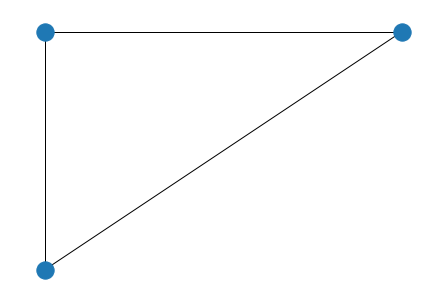

In [28]:
G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")

G.add_edge("nodeA", "nodeB")
G.add_edge("nodeA", "nodeC")
G.add_edge("nodeB", "nodeC")

pos = {}
pos['nodeA'] = (0,0)
pos['nodeB'] = (1,1)
pos['nodeC'] = (0,1)

nx.draw(G, pos)
plt.show()

### 테크닉 54 : 네트워크에 노드를 추가해보자

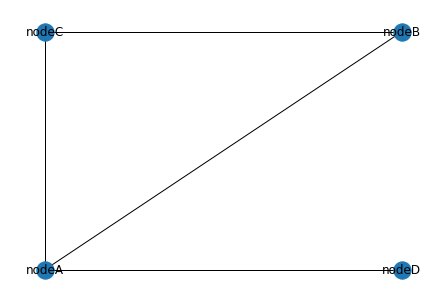

In [29]:
G.add_node("nodeD")
G.add_edge("nodeA", "nodeD")
pos["nodeD"] = (1,0)

nx.draw(G, pos, with_labels=True)

### 테크닉 55 : 경로에 가중치를 부여하자

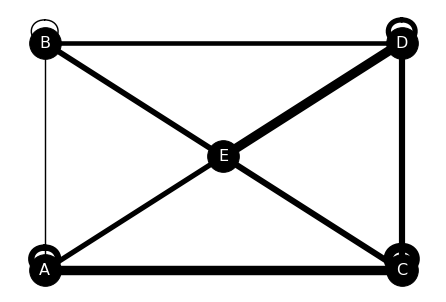

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

df_w = pd.read_csv('network_weight.csv')
df_p = pd.read_csv('network_pos.csv')

size = 10
edges_weights = []

for i in range(len(df_w)):
    for j in range(len(df_w.columns)):
        edges_weights.append(df_w.iloc[i][j]*size)

G = nx.Graph()
# 노드 설정
for i in range(len(df_w)):
    G.add_node(df_w.columns[i])
# 엣지 설정
for i in range(len(df_w.columns)):
    for j in range(len(df_w.columns)):
        G.add_edge(df_w.columns[i],df_w.columns[j])
# 좌표 설정
pos = {}
for i in range(len(df_w.columns)):
    node = df_w.columns[i]
    pos[node] = (df_p[node][0], df_p[node][1])
    
# 그리기
nx.draw(G, pos, with_labels=True, font_size= 16, node_size=1000, node_color='k', font_color="w", width = edges_weights)
# 표시
plt.show()

### 테크닉 56 : 운송경로 정보를 불러오자

In [35]:
df_tr = pd.read_csv('trans_route.csv', index_col = '공장')
df_tr

,F1,F2,F3,F4
공장,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


### 테크닉 57 : 운송경로정보로 네트워크를 가시화해보자

In [36]:
df_tr = pd.read_csv('trans_route.csv', index_col="공장")
df_pos = pd.read_csv('trans_route_pos.csv')

In [51]:
df_tr

,F1,F2,F3,F4
공장,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [52]:
df_pos

,W1,W2,W3,F1,F2,F3,F4
0,0,0,0,4.0,4.0,4.0,4.0
1,1,2,3,0.5,1.5,2.5,3.5


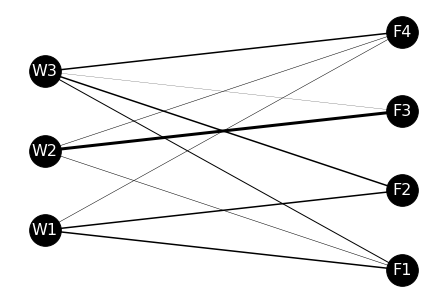

In [54]:
G = nx.Graph()

for i in range(len(df_pos.columns)):
    G.add_node(df_pos.columns[i])

num_pre = 0
edge_weights = []
size = 0.1
    
for i in range(len(df_pos.columns)):
    for j in range(len(df_pos.columns)):
        if not(i==j):
            G.add_edge(df_pos.columns[i], df_pos.columns[j])
            if num_pre<len(G.edges):
                num_pre = len(G.edges)
                weight = 0
                # 창고 -> 공장 경로인 경우
                if(df_pos.columns[i] in df_tr.columns) and (df_pos.columns[j] in df_tr.index):
                    if df_tr[df_pos.columns[i]][df_pos.columns[j]]:
                        weight = df_tr[df_pos.columns[i]][df_pos.columns[j]]*size
                # ??
                elif(df_pos.columns[j] in df_tr.columns) and (df_pos.columns[i] in df_tr.index):
                    if df_tr[df_pos.columns[j]][df_pos.columns[i]]:
                        weight = df_tr[df_pos.columns[j]][df_pos.columns[i]]*size
                        
                edge_weights.append(weight)
                
pos = {}
for i in range(len(df_pos.columns)):
    node = df_pos.columns[i]
    pos[node] = (df_pos[node][0], df_pos[node][1])

nx.draw(G, pos, with_labels=True, font_size=16, node_size = 1000, node_color='k', font_color='w', width=edge_weights)

plt.show()

### 테크닉 58 : 운송비용함수를 작성하자

In [59]:
df_tr = pd.read_csv('trans_route.csv', index_col='공장')
df_tc = pd.read_csv('trans_cost.csv', index_col='공장')

In [60]:
df_tc

,F1,F2,F3,F4
공장,,,,
W1,10,10,11,27
W2,18,21,12,14
W3,15,12,14,12


In [61]:
def trans_cost(df_tr, df_tc):
    cost = 0
    for i in range(len(df_tc.index)):
        for j in range(len(df_tc.columns)):
            cost += df_tr.iloc[i][j]*df_tc.iloc[i][j]
    return cost

print("총 운송 비용 : "+str(trans_cost(df_tr, df_tc)))

총 운송 비용 : 1493


### 테크닉 59 : 제약조건을 만들어보자

In [62]:
df_tr = pd.read_csv('trans_route.csv', index_col="공장")
df_demand = pd.read_csv('demand.csv')
df_supply = pd.read_csv('supply.csv')


In [66]:
df_tr

,F1,F2,F3,F4
공장,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [65]:
df_demand

,F1,F2,F3,F4
0,28,29,31,25


In [64]:
df_supply

,W1,W2,W3
0,35,41,42


In [70]:
# 수요측 제약 조건
for i in range(len(df_demand.columns)):
    temp_sum = sum(df_tr[df_demand.columns[i]])
    print(str(df_demand.columns[i])+"으로 운송량 : "+str(temp_sum)+"(수요한계 : "+str(df_demand.iloc[0][i])+")")
    if temp_sum >= df_demand.iloc[0][i]:
        print("수요량 만족시키고 있음")
    else:
        print("수요량을 만족시키 못하고 있음. 운송경로 재계산 필요")

# 공급측 제약 조건
for i in range(len(df_supply.columns)):
    temp_sum = sum(df_tr.loc[df_supply.columns[i]])
    print(str(df_supply.columns[i])+"부터의 운송량 : "+str(temp_sum)+"(공급한계 : "+str(df_supply.iloc[0][i])+")")
    if temp_sum <= df_supply.iloc[0][i]:
        print("공급한계 범위 내")
    else:
        print("공급량을 만족시키 못하고 있음. 운송경로 재계산 필요")

F1으로 운송량 : 30(수요한계 : 28)
수요량 만족시키고 있음
F2으로 운송량 : 30(수요한계 : 29)
수요량 만족시키고 있음
F3으로 운송량 : 32(수요한계 : 31)
수요량 만족시키고 있음
F4으로 운송량 : 25(수요한계 : 25)
수요량 만족시키고 있음
W1부터의 운송량 : 35(공급한계 : 35)
공급한계 범위 내
W2부터의 운송량 : 40(공급한계 : 41)
공급한계 범위 내
W3부터의 운송량 : 42(공급한계 : 42)
공급한계 범위 내


### 테크닉 60 : 운송경로를 변경해서, 운송비용함수의 변화를 확인하자